In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import csv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

In [ ]:
!pip install opendatasets





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset')

Skipping, found downloaded files in "./bank-customer-churn-dataset" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#komposisi data
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
#tipe data fitur
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

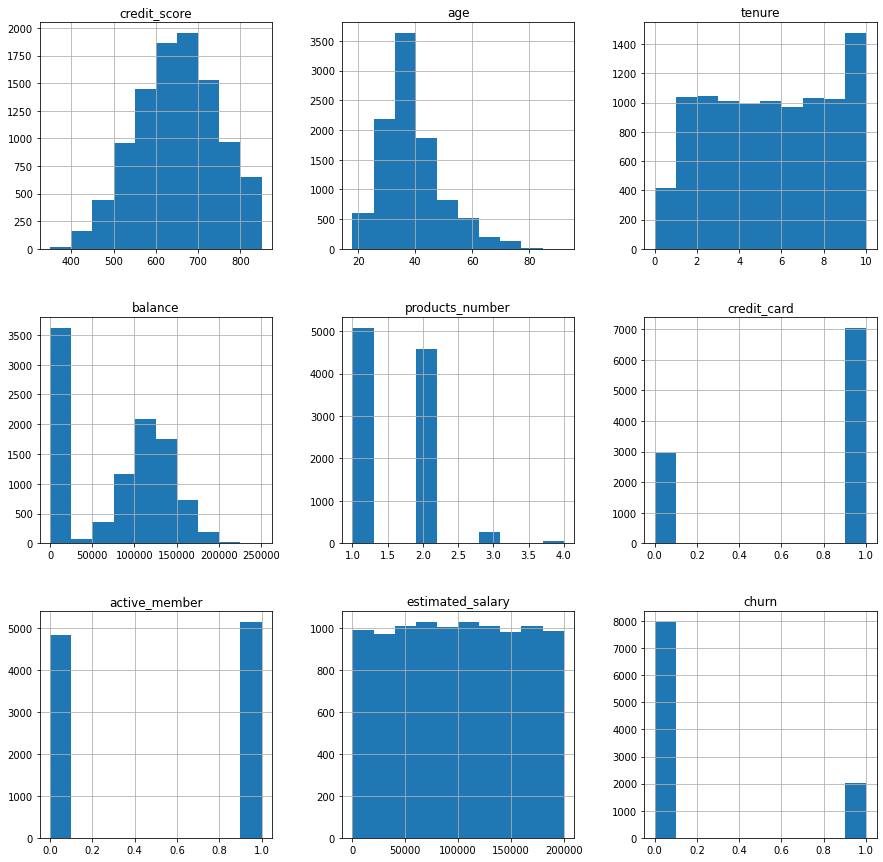

In [ ]:
#Mencari distribusi data
df_hist = df.copy()
df_hist.pop('customer_id')
df_hist.hist(figsize=(15,15))
plt.show()

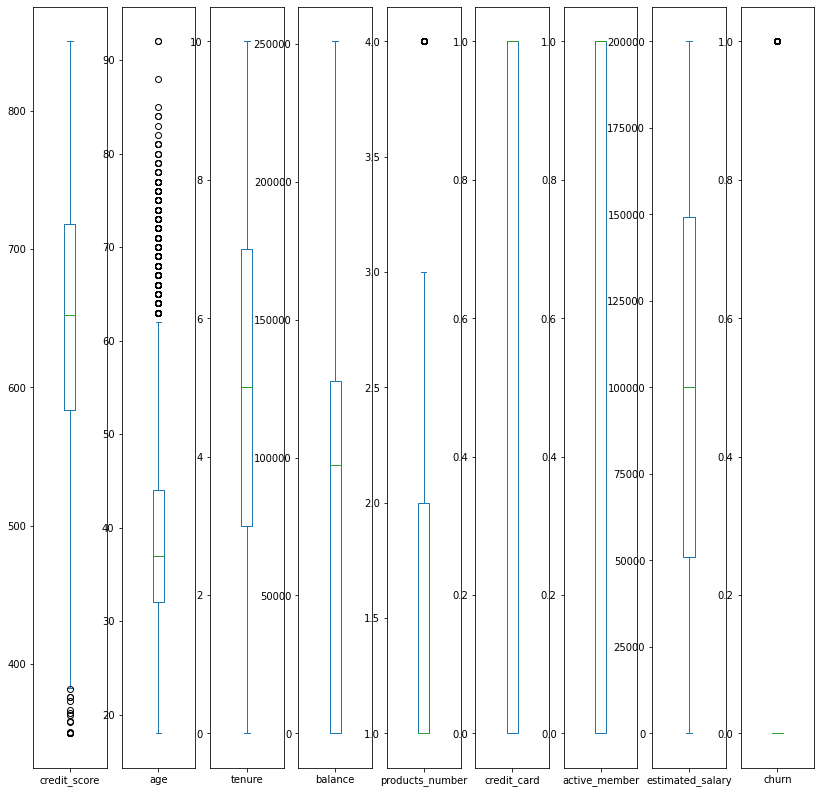

In [ ]:
#Mencari outlier
from matplotlib import pyplot
df_hist.plot.box(subplots=True, figsize=(14,14))
plt.show()

In [ ]:
#Mencari missing value
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Proses training dan testing

In [ ]:
df=df.drop(['customer_id', 'country','gender'], axis=1)

In [ ]:
import numpy as np
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1
  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

In [ ]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]
def sigd(X):
  output = []
  for i, x in enumerate(X):
    s = sig([x])[0]
    output.append(s * (1 - s))
  return output

In [ ]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1,learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i +1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1
  for i in range(0, len(n)-1):
    n[i][-1] = 1
  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]
      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])
      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))
      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1],np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))
      w += dw
    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, epoch, mse

In [ ]:
def bp_imp_fit(X, target, layer_conf, max_epoch, max_error=.1,learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i +1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]

  d = [np.empty(s) for s in layer_conf[1:]]
  da = [np.empty(s) for s in layer_conf[1:]]
  dsign = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  learnup= 1.2
  learndown= .7
  dwi = [np.empty((layer_conf[i] + 1, layer_conf[i + 1]),dtype=float) for i in range(len(layer_conf) - 1)]
  curvErr = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  epoch = 0
  mse = 1
  dmax =50
  dmin= 0.000001
  for i in range(0, len(n)-1):
    n[i][-1] = 1
  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]
      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])
      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])

      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))
      dsign[-1] = -np.sign(dw[-1])

      for L in range(len(layer_conf) - 1, 1, -1):
        da[L-2] = dsign[L-2]
        din[L-2] = np.dot(d[L-1],np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dsign[L-2] = -np.sign(d[L-2])
        #dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))


        if da[L-2].all() == dsign[L-2].all():

              dw[L-2] *= (learnup*(dsign[L-2]))
        else:
              dw[L-2] *= (learndown*(dsign[L-2]))
      w+=dw
    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, epoch, mse

In [ ]:
def bp_imp_fit2(X, target, layer_conf, max_epoch, max_error=.1,learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i +1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]

  d = [np.empty(s) for s in layer_conf[1:]]
  da = [np.empty(s) for s in layer_conf[1:]]
  dsign = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  learnup= 1.2
  learndown= .7
  dwi = [np.empty((layer_conf[i] + 1, layer_conf[i + 1]),dtype=float) for i in range(len(layer_conf) - 1)]
  curvErr = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  epoch = 0
  mse = 1
  dmax =50
  dmin= 0.000001
  for i in range(0, len(n)-1):
    n[i][-1] = 1
  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]
      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])
      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])

      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))
      dsign[-1] = -np.sign(dw[-1])
      if da[-1].all() == dsign[-1].all():

              dw[-1] *= (learnup*(dsign[-1]))
      else:
              dw[-1] *= (learndown*(dsign[-1]))
      for L in range(len(layer_conf) - 1, 1, -1):
        da[L-2] = dsign[L-2]
        din[L-2] = np.dot(d[L-1],np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dsign[L-2] = -np.sign(d[L-2])
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))


        if da[L-2].all() == dsign[L-2].all():

              dw[L-2] *= (learnup*(dsign[L-2]))
        else:
              dw[L-2] *= (learndown*(dsign[L-2]))
      w+=dw
    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, epoch, mse

In [ ]:
def bp_predict(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))
  for x in X:
    n[0][:-1] = x
    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])
    predict.append(n[-1].copy())
  return predict

In [ ]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = minmax_scale(df)
Y = onehot_enc(df.churn)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=.3,random_state=101)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(9, 2, 2),learn_rate=.3, max_epoch=1000, max_error=.5, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)
print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-15-b3d6d4566211>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i +1]) for i in range(len(layer_conf) - 1)])
<ipython-input-15-b3d6d4566211>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epochs: 1, MSE: 0.0838754287899314
Output: [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=.3,random_state=101)
w, ep, mse = bp_imp_fit(X_train, y_train, layer_conf=(9, 2, 2),learn_rate=.6, max_epoch=1000, max_error=.3, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)
print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-16-c0cd6763ec24>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i +1]) for i in range(len(layer_conf) - 1)])
<ipython-input-16-c0cd6763ec24>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w+=dw


Epochs: 1, MSE: 0.011320355811629866
Output: [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 